In [69]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_absolute_error, classification_report, confusion_matrix, roc_curve, auc
from sklearn.tree import plot_tree
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV, KFold
from sklearn.ensemble import GradientBoostingRegressor, VotingRegressor, StackingRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeRegressor


## Data preparation

### Read data from CSV

In [70]:
raw_data = pd.read_csv('../data/cleaned_movies.csv', delimiter=',')
raw_data.head()

,popularity,title,vote_average,vote_count,budget,imdb_id,runtime,years_from_release,genre_Action,genre_Adventure,...,genre_Mystery,genre_Romance,genre_Science_Fiction,genre_TV_Movie,genre_Thriller,genre_War,genre_Western,domestic,international,worldwide
0,3197.278,Venom: The Last Dance,6.500,759,120000000,tt16366836,109,0,True,True,...,False,False,True,False,False,False,False,128094490.0,308500000.0,4.365945e+08
1,2204.248,Terrifier 3,6.925,1012,2000000,tt27911000,125,0,False,False,...,True,False,False,False,True,False,False,53981071.0,31395883.0,8.537695e+07
2,1868.856,The Wild Robot,8.500,2899,78000000,tt29623480,102,0,False,False,...,False,False,True,False,False,False,False,137913995.0,171143000.0,3.090570e+08
3,1978.412,Gladiator II,6.800,400,310000000,tt9218128,148,0,True,True,...,False,False,False,False,False,False,False,0.0,87000000.0,8.700000e+07
4,1490.952,Deadpool & Wolverine,7.700,5465,200000000,tt6263850,128,0,True,False,...,False,False,True,False,False,False,False,636745858.0,701154969.0,1.337901e+09


### Remove unnecessary collumn and labeling

In [71]:
genre_columns = [col for col in raw_data.columns if col.startswith('genre_')]

for col in genre_columns:
    raw_data[col] = raw_data[col].astype(int)

numerical_data = raw_data.drop(columns=[
    'title',
    'imdb_id',
    'domestic',
    'international'
])

numerical_data.head()




,popularity,vote_average,vote_count,budget,runtime,years_from_release,genre_Action,genre_Adventure,genre_Animation,genre_Comedy,...,genre_Horror,genre_Music,genre_Mystery,genre_Romance,genre_Science_Fiction,genre_TV_Movie,genre_Thriller,genre_War,genre_Western,worldwide
0,3197.278,6.500,759,120000000,109,0,1,1,0,0,...,0,0,0,0,1,0,0,0,0,4.365945e+08
1,2204.248,6.925,1012,2000000,125,0,0,0,0,0,...,1,0,1,0,0,0,1,0,0,8.537695e+07
2,1868.856,8.500,2899,78000000,102,0,0,0,1,0,...,0,0,0,0,1,0,0,0,0,3.090570e+08
3,1978.412,6.800,400,310000000,148,0,1,1,0,0,...,0,0,0,0,0,0,0,0,0,8.700000e+07
4,1490.952,7.700,5465,200000000,128,0,1,0,0,1,...,0,0,0,0,1,0,0,0,0,1.337901e+09


### Normalize revuene

In [72]:
numerical_data['worldwide'] = np.log1p(numerical_data['worldwide'])
numerical_data['budget'] = np.log1p(numerical_data['budget'])



### Split data into train, validation and test data set

In [73]:
train_data, val_data, test_data = np.split(numerical_data.sample(frac=1, random_state=42), 
                                             [int(.6 * len(numerical_data)), 
                                              int(.8 * (len(numerical_data)))])

c:\Users\nhatm\AppData\Local\Programs\Python\Python312\Lib\site-packages\numpy\core\fromnumeric.py:59: FutureWarning: 'DataFrame.swapaxes' is deprecated and will be removed in a future version. Please use 'DataFrame.transpose' instead.
  return bound(*args, **kwds)


### Review train, val, test data

In [74]:
print("Train data shape: " + str(train_data.shape))
print("Validate data shape: " + str(val_data.shape))
print("Test data shape: " + str(test_data.shape))

Train data shape: (1390, 26)
Validate data shape: (463, 26)
Test data shape: (464, 26)


### Dimensionality reduction

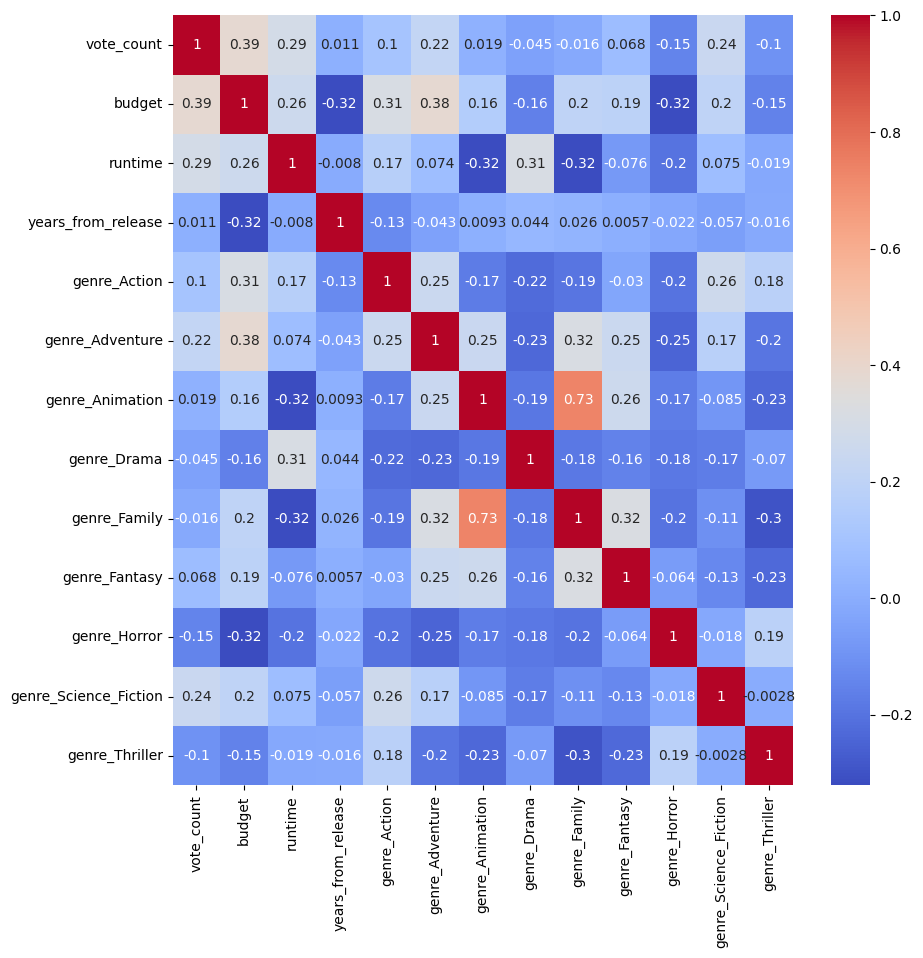

In [76]:
correlation = train_data.corr()
correlate_atribs = correlation['worldwide'][abs(correlation['worldwide']) > 0.1]
correlate_atribs = correlate_atribs.drop('worldwide')
plt.figure(figsize=(10, 10))
sns.heatmap(train_data[correlate_atribs.index].corr(), annot=True, cmap='coolwarm')
plt.show()

### Split data into X and y

In [78]:
X_train = train_data[correlate_atribs.index]
y_train = train_data['worldwide']

X_val = val_data[correlate_atribs.index]
y_val = val_data['worldwide']

X_test = test_data[correlate_atribs.index]
y_test = test_data['worldwide']

## Building predicting models

### Linear regression model

Training Results:
R2 Score: 0.5404
MSE: 1.8511
MAE: 0.8574

valation Results:
R2 Score: 0.4803
MSE: 2.0503
MAE: 0.8643

Test Results:
R2 Score: 0.4504
MSE: 2.3006
MAE: 0.9211


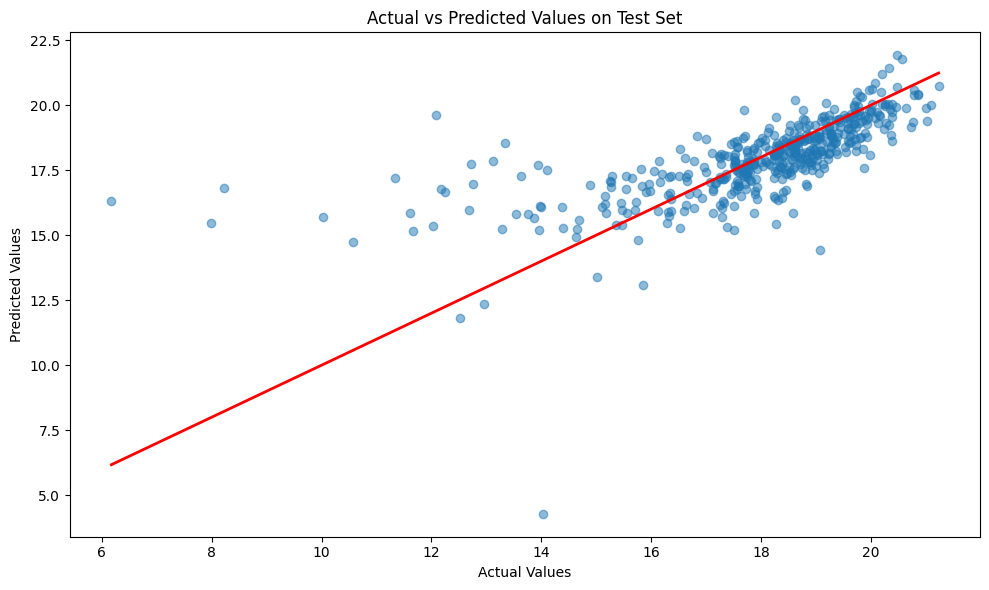

In [84]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
import matplotlib.pyplot as plt
import numpy as np

lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

y_pred_train = lr_model.predict(X_train)
y_pred_val = lr_model.predict(X_val)
y_pred_test = lr_model.predict(X_test)
train_r2 = r2_score(y_train, y_pred_train)
val_r2 = r2_score(y_val, y_pred_val)
test_r2 = r2_score(y_test, y_pred_test)

train_mse = mean_squared_error(y_train, y_pred_train)
val_mse = mean_squared_error(y_val, y_pred_val)
train_mae = mean_absolute_error(y_train, y_pred_train)
val_mae = mean_absolute_error(y_val, y_pred_val)
test_mse = mean_squared_error(y_test, y_pred_test)
test_mae = mean_absolute_error(y_test, y_pred_test)

print("Training Results:")
print(f"R2 Score: {train_r2:.4f}")
print(f"MSE: {train_mse:.4f}")
print(f"MAE: {train_mae:.4f}")

print("\nvalation Results:")
print(f"R2 Score: {val_r2:.4f}")
print(f"MSE: {val_mse:.4f}")
print(f"MAE: {val_mae:.4f}")

print("\nTest Results:")
print(f"R2 Score: {test_r2:.4f}")
print(f"MSE: {test_mse:.4f}")
print(f"MAE: {test_mae:.4f}")


plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_test, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r', lw=2)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values on Test Set')
plt.tight_layout()
plt.show()

### Random Forest Regressor

Training Results:
R2 Score: 0.9409
MSE: 0.2382
MAE: 0.2943

valation Results:
R2 Score: 0.5358
MSE: 1.8312
MAE: 0.8151

Test Results:
R2 Score: 0.5396
MSE: 1.9273
MAE: 0.8123


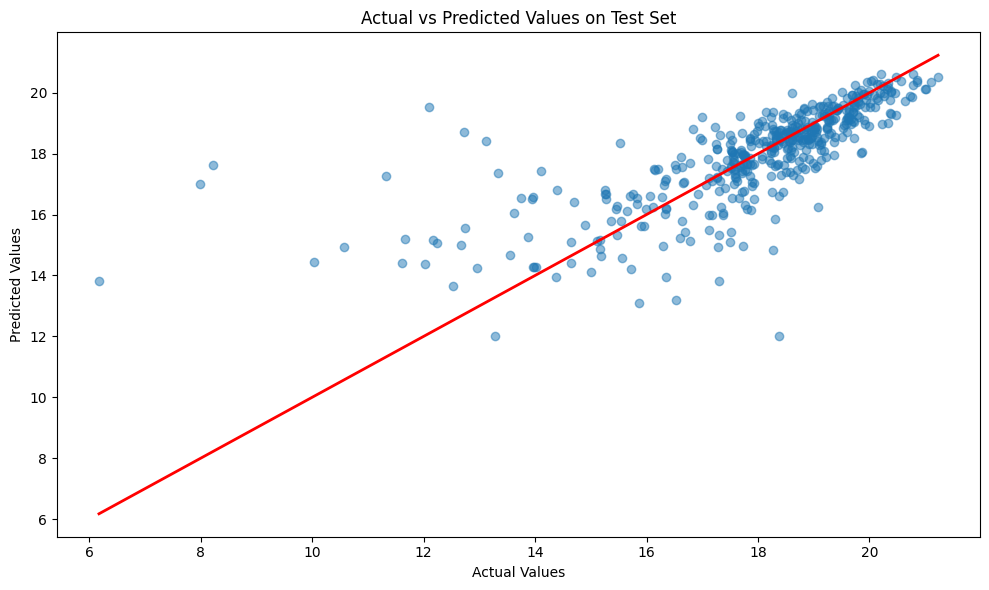

In [53]:
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

y_pred_train = rf_model.predict(X_train)
y_pred_val = rf_model.predict(X_val)
y_pred_test = rf_model.predict(X_test)

train_r2 = r2_score(y_train, y_pred_train)
val_r2 = r2_score(y_val, y_pred_val)
test_r2 = r2_score(y_test, y_pred_test)

train_mse = mean_squared_error(y_train, y_pred_train)
val_mse = mean_squared_error(y_val, y_pred_val)
train_mae = mean_absolute_error(y_train, y_pred_train)
val_mae = mean_absolute_error(y_val, y_pred_val)
test_mse = mean_squared_error(y_test, y_pred_test)
test_mae = mean_absolute_error(y_test, y_pred_test)

print("Training Results:")
print(f"R2 Score: {train_r2:.4f}")
print(f"MSE: {train_mse:.4f}")
print(f"MAE: {train_mae:.4f}")
print("\nvalation Results:")
print(f"R2 Score: {val_r2:.4f}")
print(f"MSE: {val_mse:.4f}")
print(f"MAE: {val_mae:.4f}")
print("\nTest Results:")
print(f"R2 Score: {test_r2:.4f}")
print(f"MSE: {test_mse:.4f}")
print(f"MAE: {test_mae:.4f}")

plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_test, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r', lw=2)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values on Test Set')
plt.tight_layout()
plt.show()



### SVR

Training Results:
R2 Score: 0.3516
MSE: 2.6113
MAE: 0.9956

valation Results:
R2 Score: 0.3463
MSE: 2.5791
MAE: 0.9933

Test Results:
R2 Score: 0.2454
MSE: 3.1584
MAE: 1.0801


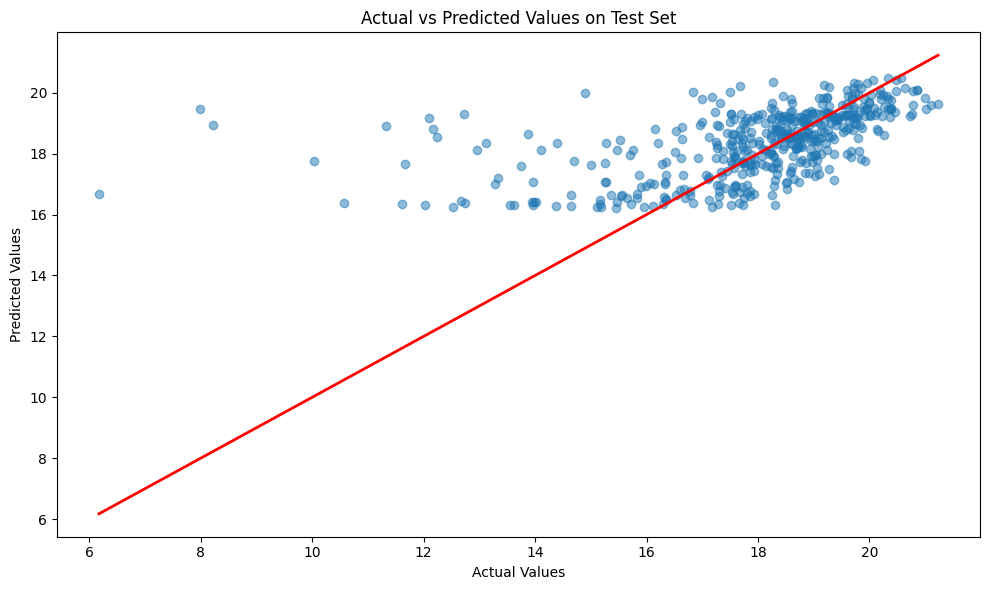

In [54]:
svr_model = SVR(kernel='rbf')
svr_model.fit(X_train, y_train)

y_pred_train = svr_model.predict(X_train)
y_pred_val = svr_model.predict(X_val)
y_pred_test = svr_model.predict(X_test)

train_r2 = r2_score(y_train, y_pred_train)
val_r2 = r2_score(y_val, y_pred_val)
test_r2 = r2_score(y_test, y_pred_test)

train_mse = mean_squared_error(y_train, y_pred_train)
val_mse = mean_squared_error(y_val, y_pred_val)
train_mae = mean_absolute_error(y_train, y_pred_train)

val_mae = mean_absolute_error(y_val, y_pred_val)
test_mse = mean_squared_error(y_test, y_pred_test)
test_mae = mean_absolute_error(y_test, y_pred_test)

print("Training Results:")
print(f"R2 Score: {train_r2:.4f}")
print(f"MSE: {train_mse:.4f}")
print(f"MAE: {train_mae:.4f}")
print("\nvalation Results:")
print(f"R2 Score: {val_r2:.4f}")
print(f"MSE: {val_mse:.4f}")
print(f"MAE: {val_mae:.4f}")
print("\nTest Results:")
print(f"R2 Score: {test_r2:.4f}")
print(f"MSE: {test_mse:.4f}")
print(f"MAE: {test_mae:.4f}")

plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_test, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r', lw=2)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values on Test Set')
plt.tight_layout()
plt.show()

### Create pipeline


In [55]:

pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('regressor', None)  
])

### Hyperparameter Tuning with GridSearchCV and valation Set

In [56]:

param_grid = [
    {
        'regressor': [LinearRegression()],
    },
    {
        'regressor': [SVR(kernel='rbf')],
    },
    {
        'regressor': [RandomForestRegressor(random_state=42)],
        'regressor__n_estimators': [50, 100, 200],
        'regressor__max_depth': [None, 10, 20, 30],
        'regressor__min_samples_split': [2, 5, 10],
        'regressor__min_samples_leaf': [1, 2, 4]
    }
]
grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
grid_search.fit(X_train, y_train)
print("Best parameters:", grid_search.best_params_)
print("Best cross-valation score (negative MSE):", grid_search.best_score_)

Best parameters: {'regressor': RandomForestRegressor(random_state=42), 'regressor__max_depth': None, 'regressor__min_samples_leaf': 4, 'regressor__min_samples_split': 10, 'regressor__n_estimators': 50}
Best cross-valation score (negative MSE): -1.7444532167143212


### Model Evaluation on valation Set

In [57]:

best_model = grid_search.best_estimator_
y_pred_val = best_model.predict(X_val)
rmse_val = np.sqrt(mean_squared_error(y_val, y_pred_val))
r2_val = r2_score(y_val, y_pred_val)

print("Best Model valation - RMSE:", rmse_val)
print("Best Model valation - R-squared:", r2_val)

Best Model valation - RMSE: 1.355501079488685
Best Model valation - R-squared: 0.5342844859653336


### Model Evaluation on Test Set

In [58]:

y_pred_test = best_model.predict(X_test)


rmse_test = np.sqrt(mean_squared_error(y_test, y_pred_test))
r2_test = r2_score(y_test, y_pred_test)

print("Best Model Test - RMSE:", rmse_test)
print("Best Model Test - R-squared:", r2_test)

Best Model Test - RMSE: 1.3459546974972243
Best Model Test - R-squared: 0.567186095300052


### Visualization

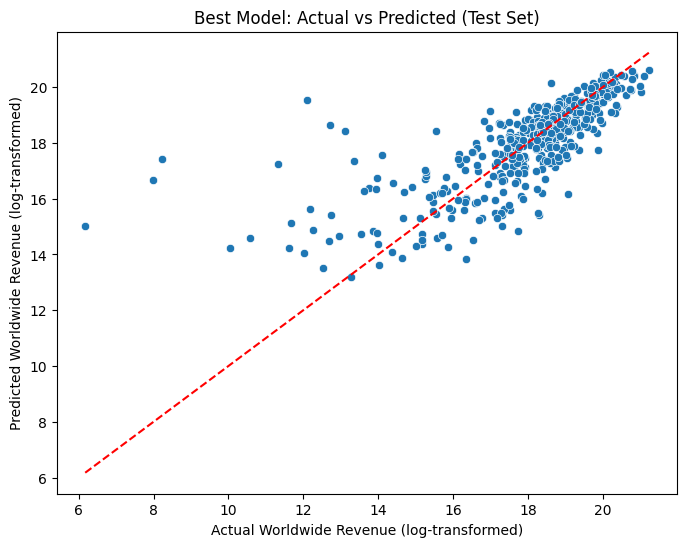

In [ ]:

plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred_test)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], '--', color='red')  
plt.title('Best Model: Actual vs Predicted (Test Set)')
plt.xlabel('Actual Worldwide Revenue (log-transformed)')
plt.ylabel('Predicted Worldwide Revenue (log-transformed)')
plt.show()